In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

# Reflect Tables into SQLAlchemy ORM

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [9]:
inspector.get_columns('Station')


[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [10]:
inspector.get_columns('Measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.


latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [11]:
wholedf = session.query(Measurement).all()
for row in wholedf:
    print (row.station, row.date, row.prcp)

USC00519397 2010-01-01 0.08
USC00519397 2010-01-02 0.0
USC00519397 2010-01-03 0.0
USC00519397 2010-01-04 0.0
USC00519397 2010-01-06 None
USC00519397 2010-01-07 0.06
USC00519397 2010-01-08 0.0
USC00519397 2010-01-09 0.0
USC00519397 2010-01-10 0.0
USC00519397 2010-01-11 0.01
USC00519397 2010-01-12 0.0
USC00519397 2010-01-14 0.0
USC00519397 2010-01-15 0.0
USC00519397 2010-01-16 0.0
USC00519397 2010-01-17 0.0
USC00519397 2010-01-18 0.0
USC00519397 2010-01-19 0.0
USC00519397 2010-01-20 0.0
USC00519397 2010-01-21 0.0
USC00519397 2010-01-22 0.0
USC00519397 2010-01-23 0.0
USC00519397 2010-01-24 0.01
USC00519397 2010-01-25 0.0
USC00519397 2010-01-26 0.04
USC00519397 2010-01-27 0.12
USC00519397 2010-01-28 0.0
USC00519397 2010-01-30 None
USC00519397 2010-01-31 0.03
USC00519397 2010-02-01 0.01
USC00519397 2010-02-03 None
USC00519397 2010-02-04 0.01
USC00519397 2010-02-05 0.0
USC00519397 2010-02-06 0.0
USC00519397 2010-02-07 0.0
USC00519397 2010-02-08 0.0
USC00519397 2010-02-09 0.0
USC00519397 2010

USC00519397 2012-05-16 0.0
USC00519397 2012-05-17 0.0
USC00519397 2012-05-18 0.0
USC00519397 2012-05-19 0.0
USC00519397 2012-05-20 0.0
USC00519397 2012-05-21 0.0
USC00519397 2012-05-22 0.0
USC00519397 2012-05-23 0.0
USC00519397 2012-05-24 0.0
USC00519397 2012-05-25 0.0
USC00519397 2012-05-26 0.0
USC00519397 2012-05-27 0.0
USC00519397 2012-05-28 0.0
USC00519397 2012-05-29 0.0
USC00519397 2012-05-30 0.0
USC00519397 2012-05-31 0.01
USC00519397 2012-06-01 0.02
USC00519397 2012-06-02 0.02
USC00519397 2012-06-03 0.0
USC00519397 2012-06-04 0.0
USC00519397 2012-06-05 0.0
USC00519397 2012-06-06 0.0
USC00519397 2012-06-07 0.0
USC00519397 2012-06-08 None
USC00519397 2012-06-09 None
USC00519397 2012-06-10 0.0
USC00519397 2012-06-11 0.0
USC00519397 2012-06-12 0.0
USC00519397 2012-06-13 0.0
USC00519397 2012-06-14 0.0
USC00519397 2012-06-15 0.0
USC00519397 2012-06-16 0.0
USC00519397 2012-06-17 0.0
USC00519397 2012-06-18 0.0
USC00519397 2012-06-19 0.0
USC00519397 2012-06-20 0.0
USC00519397 2012-06-21 

USC00519397 2014-08-10 0.0
USC00519397 2014-08-11 0.0
USC00519397 2014-08-12 0.0
USC00519397 2014-08-13 0.0
USC00519397 2014-08-14 0.06
USC00519397 2014-08-15 0.0
USC00519397 2014-08-16 0.0
USC00519397 2014-08-17 0.0
USC00519397 2014-08-18 0.0
USC00519397 2014-08-19 0.0
USC00519397 2014-08-20 0.0
USC00519397 2014-08-21 0.0
USC00519397 2014-08-22 0.0
USC00519397 2014-08-23 0.0
USC00519397 2014-08-24 0.08
USC00519397 2014-08-25 0.01
USC00519397 2014-08-26 0.05
USC00519397 2014-08-27 0.01
USC00519397 2014-08-28 0.01
USC00519397 2014-08-29 0.0
USC00519397 2014-08-30 0.0
USC00519397 2014-08-31 0.0
USC00519397 2014-09-01 0.0
USC00519397 2014-09-02 0.0
USC00519397 2014-09-03 0.0
USC00519397 2014-09-04 0.04
USC00519397 2014-09-05 0.39
USC00519397 2014-09-07 0.0
USC00519397 2014-09-08 0.0
USC00519397 2014-09-09 0.0
USC00519397 2014-09-10 0.0
USC00519397 2014-09-11 0.0
USC00519397 2014-09-12 0.0
USC00519397 2014-09-13 0.0
USC00519397 2014-09-14 0.0
USC00519397 2014-09-15 0.01
USC00519397 2014-09

USC00519397 2016-07-17 0.0
USC00519397 2016-07-18 1.25
USC00519397 2016-07-19 0.03
USC00519397 2016-07-20 0.0
USC00519397 2016-07-21 0.04
USC00519397 2016-07-22 0.02
USC00519397 2016-07-23 0.0
USC00519397 2016-07-24 0.13
USC00519397 2016-07-25 4.2
USC00519397 2016-07-26 0.0
USC00519397 2016-07-27 0.0
USC00519397 2016-07-28 0.0
USC00519397 2016-07-29 0.0
USC00519397 2016-07-30 0.0
USC00519397 2016-07-31 0.06
USC00519397 2016-08-01 0.08
USC00519397 2016-08-02 0.05
USC00519397 2016-08-03 0.0
USC00519397 2016-08-04 0.04
USC00519397 2016-08-05 0.01
USC00519397 2016-08-06 0.0
USC00519397 2016-08-07 0.39
USC00519397 2016-08-08 0.02
USC00519397 2016-08-09 0.0
USC00519397 2016-08-10 0.0
USC00519397 2016-08-11 0.0
USC00519397 2016-08-12 0.0
USC00519397 2016-08-13 0.0
USC00519397 2016-08-14 0.0
USC00519397 2016-08-15 0.0
USC00519397 2016-08-16 0.0
USC00519397 2016-08-17 0.0
USC00519397 2016-08-18 0.0
USC00519397 2016-08-19 0.04
USC00519397 2016-08-20 0.0
USC00519397 2016-08-21 0.12
USC00519397 20

USC00513117 2011-02-24 3.3
USC00513117 2011-02-25 0.0
USC00513117 2011-02-26 0.0
USC00513117 2011-02-27 0.02
USC00513117 2011-02-28 0.0
USC00513117 2011-03-01 0.14
USC00513117 2011-03-02 0.0
USC00513117 2011-03-03 0.12
USC00513117 2011-03-04 1.05
USC00513117 2011-03-05 0.13
USC00513117 2011-03-06 1.16
USC00513117 2011-03-07 0.01
USC00513117 2011-03-08 0.03
USC00513117 2011-03-09 0.09
USC00513117 2011-03-10 1.33
USC00513117 2011-03-11 0.07
USC00513117 2011-03-12 0.14
USC00513117 2011-03-13 0.0
USC00513117 2011-03-14 0.0
USC00513117 2011-03-15 0.0
USC00513117 2011-03-16 0.01
USC00513117 2011-03-17 0.01
USC00513117 2011-03-18 0.03
USC00513117 2011-03-19 0.04
USC00513117 2011-03-20 0.14
USC00513117 2011-03-21 0.0
USC00513117 2011-03-22 0.18
USC00513117 2011-03-23 0.04
USC00513117 2011-03-24 0.12
USC00513117 2011-03-25 0.07
USC00513117 2011-03-26 0.02
USC00513117 2011-03-27 0.04
USC00513117 2011-03-28 0.08
USC00513117 2011-03-29 0.05
USC00513117 2011-03-30 0.08
USC00513117 2011-03-31 0.0
US

USC00513117 2013-04-28 0.0
USC00513117 2013-04-29 0.0
USC00513117 2013-04-30 0.0
USC00513117 2013-05-01 0.04
USC00513117 2013-05-02 0.0
USC00513117 2013-05-03 0.0
USC00513117 2013-05-04 0.0
USC00513117 2013-05-05 1.05
USC00513117 2013-05-06 0.09
USC00513117 2013-05-07 0.0
USC00513117 2013-05-08 0.0
USC00513117 2013-05-09 0.0
USC00513117 2013-05-10 0.1
USC00513117 2013-05-11 0.09
USC00513117 2013-05-12 0.22
USC00513117 2013-05-13 0.95
USC00513117 2013-05-14 0.01
USC00513117 2013-05-15 0.0
USC00513117 2013-05-16 0.0
USC00513117 2013-05-17 0.0
USC00513117 2013-05-18 0.0
USC00513117 2013-05-19 0.02
USC00513117 2013-05-20 0.54
USC00513117 2013-05-21 0.0
USC00513117 2013-05-22 0.0
USC00513117 2013-05-23 0.0
USC00513117 2013-05-24 0.0
USC00513117 2013-05-25 0.12
USC00513117 2013-05-26 0.18
USC00513117 2013-05-27 0.02
USC00513117 2013-05-28 0.06
USC00513117 2013-05-29 0.21
USC00513117 2013-05-30 0.74
USC00513117 2013-05-31 0.04
USC00513117 2013-06-01 0.05
USC00513117 2013-06-02 0.02
USC0051311

USC00513117 2015-01-06 0.07
USC00513117 2015-01-07 0.0
USC00513117 2015-01-08 0.0
USC00513117 2015-01-09 0.0
USC00513117 2015-01-10 0.04
USC00513117 2015-01-11 0.0
USC00513117 2015-01-12 0.0
USC00513117 2015-01-13 0.0
USC00513117 2015-01-14 0.0
USC00513117 2015-01-15 0.0
USC00513117 2015-01-16 0.01
USC00513117 2015-01-17 0.0
USC00513117 2015-01-18 0.0
USC00513117 2015-01-19 0.0
USC00513117 2015-01-20 0.0
USC00513117 2015-01-21 0.0
USC00513117 2015-01-22 0.0
USC00513117 2015-01-23 0.0
USC00513117 2015-01-24 0.09
USC00513117 2015-01-25 0.46
USC00513117 2015-01-26 0.73
USC00513117 2015-01-27 0.01
USC00513117 2015-01-28 0.09
USC00513117 2015-01-29 0.0
USC00513117 2015-01-30 0.02
USC00513117 2015-01-31 0.0
USC00513117 2015-02-01 0.0
USC00513117 2015-02-02 0.0
USC00513117 2015-02-03 0.0
USC00513117 2015-02-04 0.77
USC00513117 2015-02-05 0.0
USC00513117 2015-02-06 0.0
USC00513117 2015-02-07 0.0
USC00513117 2015-02-08 0.0
USC00513117 2015-02-09 0.0
USC00513117 2015-02-10 0.1
USC00513117 2015-0

USC00513117 2016-10-12 0.03
USC00513117 2016-10-13 0.0
USC00513117 2016-10-14 0.0
USC00513117 2016-10-15 0.0
USC00513117 2016-10-16 0.0
USC00513117 2016-10-17 0.03
USC00513117 2016-10-18 0.05
USC00513117 2016-10-19 0.06
USC00513117 2016-10-20 0.0
USC00513117 2016-10-21 0.15
USC00513117 2016-10-22 0.1
USC00513117 2016-10-23 0.01
USC00513117 2016-10-24 0.0
USC00513117 2016-10-25 0.04
USC00513117 2016-10-26 0.06
USC00513117 2016-10-27 0.11
USC00513117 2016-10-28 0.02
USC00513117 2016-10-29 0.02
USC00513117 2016-10-30 0.1
USC00513117 2016-10-31 0.03
USC00513117 2016-11-01 0.01
USC00513117 2016-11-02 0.0
USC00513117 2016-11-03 0.0
USC00513117 2016-11-04 0.0
USC00513117 2016-11-05 0.02
USC00513117 2016-11-06 0.02
USC00513117 2016-11-07 0.0
USC00513117 2016-11-08 0.14
USC00513117 2016-11-09 0.08
USC00513117 2016-11-10 0.0
USC00513117 2016-11-11 0.0
USC00513117 2016-11-12 0.0
USC00513117 2016-11-13 0.0
USC00513117 2016-11-14 0.06
USC00513117 2016-11-15 0.0
USC00513117 2016-11-16 0.14
USC005131

USC00514830 2011-05-31 0.0
USC00514830 2011-06-01 0.19
USC00514830 2011-06-02 0.04
USC00514830 2011-06-03 1.75
USC00514830 2011-06-04 1.14
USC00514830 2011-06-05 3.6
USC00514830 2011-06-06 0.0
USC00514830 2011-06-07 0.05
USC00514830 2011-06-08 0.17
USC00514830 2011-06-09 0.0
USC00514830 2011-06-10 0.02
USC00514830 2011-06-13 None
USC00514830 2011-06-14 0.02
USC00514830 2011-06-15 0.0
USC00514830 2011-06-16 0.13
USC00514830 2011-06-17 0.0
USC00514830 2011-06-18 0.0
USC00514830 2011-06-19 0.12
USC00514830 2011-06-21 None
USC00514830 2011-06-22 0.2
USC00514830 2011-06-23 0.09
USC00514830 2011-06-24 0.17
USC00514830 2011-06-25 0.03
USC00514830 2011-06-27 None
USC00514830 2011-06-28 0.12
USC00514830 2011-07-01 0.01
USC00514830 2011-07-03 None
USC00514830 2011-07-04 0.02
USC00514830 2011-07-05 0.14
USC00514830 2011-07-06 0.0
USC00514830 2011-07-07 0.06
USC00514830 2011-07-08 0.15
USC00514830 2011-07-09 0.07
USC00514830 2011-07-10 0.02
USC00514830 2011-07-12 None
USC00514830 2011-07-13 0.03
U

USC00514830 2013-10-16 0.02
USC00514830 2013-10-17 0.0
USC00514830 2013-10-18 0.01
USC00514830 2013-10-19 0.05
USC00514830 2013-10-20 0.0
USC00514830 2013-10-21 0.0
USC00514830 2013-10-22 0.0
USC00514830 2013-10-23 0.0
USC00514830 2013-10-24 0.0
USC00514830 2013-10-25 0.0
USC00514830 2013-10-26 0.0
USC00514830 2013-10-28 None
USC00514830 2013-10-29 0.0
USC00514830 2013-10-30 0.0
USC00514830 2013-10-31 0.1
USC00514830 2013-11-01 0.0
USC00514830 2013-11-04 None
USC00514830 2013-11-05 0.0
USC00514830 2013-11-06 0.14
USC00514830 2013-11-07 0.62
USC00514830 2013-11-08 1.55
USC00514830 2013-11-09 0.87
USC00514830 2013-11-10 2.77
USC00514830 2013-11-11 0.32
USC00514830 2013-11-12 0.03
USC00514830 2013-11-13 0.0
USC00514830 2013-11-14 0.0
USC00514830 2013-11-15 0.47
USC00514830 2013-11-16 0.0
USC00514830 2013-11-17 0.0
USC00514830 2013-11-18 0.04
USC00514830 2013-11-19 0.0
USC00514830 2013-11-20 0.0
USC00514830 2013-11-21 0.0
USC00514830 2013-11-22 0.0
USC00514830 2013-11-23 0.09
USC00514830 2

USC00514830 2016-02-25 0.0
USC00514830 2016-02-26 0.36
USC00514830 2016-02-27 0.0
USC00514830 2016-02-28 0.0
USC00514830 2016-02-29 0.05
USC00514830 2016-03-01 0.07
USC00514830 2016-03-02 0.0
USC00514830 2016-03-03 0.0
USC00514830 2016-03-04 0.0
USC00514830 2016-03-05 0.0
USC00514830 2016-03-06 0.0
USC00514830 2016-03-07 0.0
USC00514830 2016-03-08 0.0
USC00514830 2016-03-09 0.22
USC00514830 2016-03-10 0.0
USC00514830 2016-03-11 0.01
USC00514830 2016-03-12 0.0
USC00514830 2016-03-14 None
USC00514830 2016-03-15 1.08
USC00514830 2016-03-16 0.06
USC00514830 2016-03-17 0.0
USC00514830 2016-03-18 0.13
USC00514830 2016-03-19 0.03
USC00514830 2016-03-20 0.0
USC00514830 2016-03-21 0.0
USC00514830 2016-03-22 0.0
USC00514830 2016-03-23 0.72
USC00514830 2016-03-24 0.0
USC00514830 2016-03-25 0.04
USC00514830 2016-03-26 0.02
USC00514830 2016-03-28 None
USC00514830 2016-03-29 0.0
USC00514830 2016-03-30 0.0
USC00514830 2016-03-31 0.0
USC00514830 2016-04-01 0.0
USC00514830 2016-04-02 0.0
USC00514830 20

USC00517948 2012-02-24 0.0
USC00517948 2012-02-27 None
USC00517948 2012-02-28 0.0
USC00517948 2012-02-29 None
USC00517948 2012-03-01 None
USC00517948 2012-03-02 None
USC00517948 2012-03-19 None
USC00517948 2012-03-20 0.0
USC00517948 2012-03-21 None
USC00517948 2012-03-22 None
USC00517948 2012-03-23 0.02
USC00517948 2012-03-27 None
USC00517948 2012-03-28 None
USC00517948 2012-03-29 None
USC00517948 2012-03-30 None
USC00517948 2012-04-02 None
USC00517948 2012-04-03 0.0
USC00517948 2012-04-04 0.0
USC00517948 2012-04-05 0.0
USC00517948 2012-04-09 None
USC00517948 2012-04-10 0.14
USC00517948 2012-04-11 0.07
USC00517948 2012-04-12 0.0
USC00517948 2012-04-13 0.0
USC00517948 2012-04-16 None
USC00517948 2012-04-17 0.0
USC00517948 2012-04-18 None
USC00517948 2012-04-19 None
USC00517948 2012-04-20 None
USC00517948 2012-04-23 0.26
USC00517948 2012-04-24 None
USC00517948 2012-04-25 None
USC00517948 2012-04-26 None
USC00517948 2012-04-27 None
USC00517948 2012-05-02 None
USC00517948 2012-05-04 0.07
U

USC00517948 2016-07-20 None
USC00517948 2016-07-21 None
USC00517948 2016-07-25 None
USC00517948 2016-07-26 0.01
USC00517948 2016-07-27 None
USC00517948 2016-08-02 0.0
USC00517948 2016-08-03 0.02
USC00517948 2016-08-04 0.13
USC00517948 2016-08-05 0.03
USC00517948 2016-08-08 None
USC00517948 2016-08-09 None
USC00517948 2016-08-10 None
USC00517948 2016-08-11 None
USC00517948 2016-08-12 None
USC00517948 2016-08-15 None
USC00517948 2016-08-16 0.0
USC00517948 2016-08-17 0.0
USC00517948 2016-08-18 0.0
USC00517948 2016-08-22 None
USC00517948 2016-08-23 None
USC00517948 2016-08-24 None
USC00517948 2016-08-25 0.0
USC00517948 2016-08-26 0.04
USC00517948 2016-08-29 None
USC00517948 2016-08-30 0.02
USC00517948 2016-08-31 None
USC00517948 2016-09-01 None
USC00517948 2016-09-02 None
USC00517948 2016-09-08 None
USC00517948 2016-09-09 None
USC00517948 2016-09-12 None
USC00517948 2016-09-13 None
USC00517948 2016-09-14 None
USC00517948 2016-09-15 None
USC00517948 2016-09-16 0.0
USC00517948 2016-09-19 Non

USC00519523 2010-05-02 0.12
USC00519523 2010-05-03 0.46
USC00519523 2010-05-04 0.07
USC00519523 2010-05-05 0.0
USC00519523 2010-05-06 0.0
USC00519523 2010-05-07 0.01
USC00519523 2010-05-08 0.05
USC00519523 2010-05-09 0.0
USC00519523 2010-05-10 0.0
USC00519523 2010-05-11 0.0
USC00519523 2010-05-12 0.08
USC00519523 2010-05-14 0.0
USC00519523 2010-05-15 0.05
USC00519523 2010-05-16 0.06
USC00519523 2010-05-17 0.03
USC00519523 2010-05-18 0.0
USC00519523 2010-05-19 0.0
USC00519523 2010-05-20 0.01
USC00519523 2010-05-21 0.0
USC00519523 2010-05-22 0.0
USC00519523 2010-05-23 0.05
USC00519523 2010-05-24 0.06
USC00519523 2010-05-25 0.0
USC00519523 2010-05-26 0.08
USC00519523 2010-05-27 0.0
USC00519523 2010-05-29 0.0
USC00519523 2010-05-30 0.0
USC00519523 2010-05-31 0.0
USC00519523 2010-06-01 0.03
USC00519523 2010-06-02 0.0
USC00519523 2010-06-03 0.0
USC00519523 2010-06-04 0.0
USC00519523 2010-06-05 0.0
USC00519523 2010-06-06 0.0
USC00519523 2010-06-07 0.0
USC00519523 2010-06-08 0.01
USC00519523 2

USC00519523 2012-08-18 0.03
USC00519523 2012-08-19 0.05
USC00519523 2012-08-20 0.0
USC00519523 2012-08-21 0.02
USC00519523 2012-08-22 0.01
USC00519523 2012-08-23 0.0
USC00519523 2012-08-24 0.0
USC00519523 2012-08-25 0.0
USC00519523 2012-08-26 0.01
USC00519523 2012-08-27 0.04
USC00519523 2012-08-28 0.03
USC00519523 2012-08-29 0.05
USC00519523 2012-08-30 0.04
USC00519523 2012-08-31 0.0
USC00519523 2012-09-01 0.0
USC00519523 2012-09-02 0.0
USC00519523 2012-09-03 0.0
USC00519523 2012-09-04 0.0
USC00519523 2012-09-05 0.0
USC00519523 2012-09-06 0.07
USC00519523 2012-09-07 0.02
USC00519523 2012-09-08 0.14
USC00519523 2012-09-09 0.02
USC00519523 2012-09-10 0.0
USC00519523 2012-09-11 0.0
USC00519523 2012-09-12 0.05
USC00519523 2012-09-13 0.0
USC00519523 2012-09-14 0.19
USC00519523 2012-09-15 0.0
USC00519523 2012-09-16 0.0
USC00519523 2012-09-17 0.0
USC00519523 2012-09-18 0.13
USC00519523 2012-09-19 0.27
USC00519523 2012-09-20 0.21
USC00519523 2012-09-21 0.05
USC00519523 2012-09-22 0.0
USC005195

USC00519523 2015-01-15 0.0
USC00519523 2015-01-16 0.01
USC00519523 2015-01-17 0.0
USC00519523 2015-01-18 0.0
USC00519523 2015-01-19 0.0
USC00519523 2015-01-20 0.0
USC00519523 2015-01-21 0.0
USC00519523 2015-01-22 0.0
USC00519523 2015-01-23 0.0
USC00519523 2015-01-24 0.47
USC00519523 2015-01-25 0.59
USC00519523 2015-01-26 0.19
USC00519523 2015-01-27 0.0
USC00519523 2015-01-28 0.1
USC00519523 2015-01-29 0.0
USC00519523 2015-01-30 0.01
USC00519523 2015-01-31 0.0
USC00519523 2015-02-01 0.04
USC00519523 2015-02-02 0.0
USC00519523 2015-02-04 None
USC00519523 2015-02-05 0.05
USC00519523 2015-02-06 0.0
USC00519523 2015-02-07 0.0
USC00519523 2015-02-08 0.0
USC00519523 2015-02-09 0.0
USC00519523 2015-02-10 0.15
USC00519523 2015-02-11 0.0
USC00519523 2015-02-12 0.0
USC00519523 2015-02-13 0.0
USC00519523 2015-02-14 0.22
USC00519523 2015-02-15 0.97
USC00519523 2015-02-16 0.01
USC00519523 2015-02-17 0.0
USC00519523 2015-02-18 0.0
USC00519523 2015-02-20 None
USC00519523 2015-02-21 0.73
USC00519523 20

USC00519281 2010-03-14 0.0
USC00519281 2010-03-15 0.23
USC00519281 2010-03-16 0.5
USC00519281 2010-03-17 0.19
USC00519281 2010-03-18 0.69
USC00519281 2010-03-19 0.19
USC00519281 2010-03-20 0.0
USC00519281 2010-03-21 0.05
USC00519281 2010-03-22 0.0
USC00519281 2010-03-23 0.0
USC00519281 2010-03-24 0.02
USC00519281 2010-03-25 0.06
USC00519281 2010-03-26 0.12
USC00519281 2010-03-27 0.0
USC00519281 2010-03-28 0.0
USC00519281 2010-03-29 0.01
USC00519281 2010-03-30 0.03
USC00519281 2010-03-31 0.0
USC00519281 2010-04-01 0.03
USC00519281 2010-04-02 0.11
USC00519281 2010-04-03 0.18
USC00519281 2010-04-04 0.11
USC00519281 2010-04-05 0.57
USC00519281 2010-04-06 0.16
USC00519281 2010-04-07 3.99
USC00519281 2010-04-08 0.1
USC00519281 2010-04-09 0.01
USC00519281 2010-04-10 0.14
USC00519281 2010-04-11 0.02
USC00519281 2010-04-12 0.0
USC00519281 2010-04-13 0.02
USC00519281 2010-04-14 0.14
USC00519281 2010-04-15 0.0
USC00519281 2010-04-16 0.0
USC00519281 2010-04-17 0.03
USC00519281 2010-04-18 0.0
USC00

USC00519281 2012-05-21 0.08
USC00519281 2012-05-22 0.0
USC00519281 2012-05-23 0.0
USC00519281 2012-05-24 0.01
USC00519281 2012-05-25 0.02
USC00519281 2012-05-26 0.08
USC00519281 2012-05-27 0.02
USC00519281 2012-05-28 0.06
USC00519281 2012-05-29 0.0
USC00519281 2012-05-30 0.01
USC00519281 2012-05-31 0.02
USC00519281 2012-06-01 0.02
USC00519281 2012-06-02 0.08
USC00519281 2012-06-03 0.0
USC00519281 2012-06-04 0.0
USC00519281 2012-06-05 0.0
USC00519281 2012-06-06 0.1
USC00519281 2012-06-07 0.07
USC00519281 2012-06-08 0.01
USC00519281 2012-06-09 0.0
USC00519281 2012-06-10 0.0
USC00519281 2012-06-11 0.11
USC00519281 2012-06-12 0.16
USC00519281 2012-06-13 0.07
USC00519281 2012-06-14 0.21
USC00519281 2012-06-15 0.0
USC00519281 2012-06-16 0.0
USC00519281 2012-06-17 0.02
USC00519281 2012-06-18 0.0
USC00519281 2012-06-19 0.02
USC00519281 2012-06-20 0.33
USC00519281 2012-06-21 0.26
USC00519281 2012-06-22 0.03
USC00519281 2012-06-23 0.35
USC00519281 2012-06-24 0.14
USC00519281 2012-06-25 0.13
USC0

USC00519281 2014-06-28 0.6
USC00519281 2014-06-29 0.48
USC00519281 2014-06-30 0.01
USC00519281 2014-07-01 0.0
USC00519281 2014-07-02 0.05
USC00519281 2014-07-03 0.16
USC00519281 2014-07-04 0.07
USC00519281 2014-07-05 0.0
USC00519281 2014-07-06 0.37
USC00519281 2014-07-07 0.12
USC00519281 2014-07-08 0.08
USC00519281 2014-07-09 0.19
USC00519281 2014-07-10 0.16
USC00519281 2014-07-11 0.05
USC00519281 2014-07-12 0.0
USC00519281 2014-07-13 0.18
USC00519281 2014-07-14 0.33
USC00519281 2014-07-15 0.15
USC00519281 2014-07-16 0.67
USC00519281 2014-07-17 0.01
USC00519281 2014-07-18 0.14
USC00519281 2014-07-19 0.0
USC00519281 2014-07-20 7.97
USC00519281 2014-07-21 0.17
USC00519281 2014-07-22 0.49
USC00519281 2014-07-23 0.06
USC00519281 2014-07-24 0.02
USC00519281 2014-07-25 0.0
USC00519281 2014-07-26 0.13
USC00519281 2014-07-27 0.16
USC00519281 2014-07-28 0.0
USC00519281 2014-07-29 0.0
USC00519281 2014-07-30 0.0
USC00519281 2014-07-31 0.0
USC00519281 2014-08-01 0.0
USC00519281 2014-08-02 0.31
USC

USC00519281 2017-01-25 0.79
USC00519281 2017-01-26 0.0
USC00519281 2017-01-27 0.03
USC00519281 2017-01-28 0.0
USC00519281 2017-01-29 0.26
USC00519281 2017-01-30 0.0
USC00519281 2017-01-31 0.0
USC00519281 2017-02-01 0.0
USC00519281 2017-02-02 0.0
USC00519281 2017-02-03 0.0
USC00519281 2017-02-04 0.0
USC00519281 2017-02-05 0.0
USC00519281 2017-02-06 0.18
USC00519281 2017-02-07 1.32
USC00519281 2017-02-08 0.0
USC00519281 2017-02-09 0.0
USC00519281 2017-02-10 0.0
USC00519281 2017-02-11 1.73
USC00519281 2017-02-12 2.98
USC00519281 2017-02-13 0.01
USC00519281 2017-02-14 0.0
USC00519281 2017-02-15 0.01
USC00519281 2017-02-16 0.73
USC00519281 2017-02-17 0.13
USC00519281 2017-02-18 0.0
USC00519281 2017-02-19 0.09
USC00519281 2017-02-20 0.0
USC00519281 2017-02-21 0.0
USC00519281 2017-02-22 0.06
USC00519281 2017-02-23 0.0
USC00519281 2017-02-24 0.0
USC00519281 2017-02-25 0.0
USC00519281 2017-02-26 0.0
USC00519281 2017-02-27 0.0
USC00519281 2017-02-28 0.04
USC00519281 2017-03-01 2.12
USC00519281 2

USC00511918 2011-06-13 0.0
USC00511918 2011-06-14 0.0
USC00511918 2011-06-15 0.0
USC00511918 2011-06-16 0.01
USC00511918 2011-06-17 0.0
USC00511918 2011-06-18 0.0
USC00511918 2011-06-19 0.0
USC00511918 2011-06-20 0.01
USC00511918 2011-06-21 0.03
USC00511918 2011-06-22 0.1
USC00511918 2011-06-23 0.01
USC00511918 2011-06-24 0.0
USC00511918 2011-06-25 0.0
USC00511918 2011-06-26 0.0
USC00511918 2011-06-27 0.0
USC00511918 2011-06-28 0.0
USC00511918 2011-06-29 0.0
USC00511918 2011-06-30 0.0
USC00511918 2011-07-01 0.0
USC00511918 2011-07-02 0.02
USC00511918 2011-07-03 0.0
USC00511918 2011-07-04 0.0
USC00511918 2011-07-05 0.0
USC00511918 2011-07-06 0.0
USC00511918 2011-07-07 0.03
USC00511918 2011-07-08 0.0
USC00511918 2011-07-09 0.0
USC00511918 2011-07-10 0.02
USC00511918 2011-07-11 0.0
USC00511918 2011-07-12 0.0
USC00511918 2011-07-13 0.0
USC00511918 2011-07-14 0.0
USC00511918 2011-07-15 0.0
USC00511918 2011-07-16 0.0
USC00511918 2011-07-17 0.02
USC00511918 2011-07-18 0.0
USC00511918 2011-07-

USC00511918 2013-10-02 0.0
USC00511918 2013-10-03 0.0
USC00511918 2013-10-04 0.0
USC00511918 2013-10-05 0.0
USC00511918 2013-10-06 0.0
USC00511918 2013-10-07 0.01
USC00511918 2013-10-08 0.0
USC00511918 2013-10-09 0.03
USC00511918 2013-10-10 0.0
USC00511918 2013-10-11 0.0
USC00511918 2013-10-12 0.0
USC00511918 2013-10-13 0.0
USC00511918 2013-10-14 0.0
USC00511918 2013-10-15 0.38
USC00511918 2013-10-16 0.08
USC00511918 2013-10-17 0.01
USC00511918 2013-10-18 0.0
USC00511918 2013-10-19 0.01
USC00511918 2013-10-20 0.01
USC00511918 2013-10-21 0.0
USC00511918 2013-10-22 0.0
USC00511918 2013-10-23 0.0
USC00511918 2013-10-24 0.0
USC00511918 2013-10-25 0.0
USC00511918 2013-10-26 0.0
USC00511918 2013-10-27 0.0
USC00511918 2013-10-28 0.0
USC00511918 2013-10-29 0.0
USC00511918 2013-10-30 0.0
USC00511918 2013-10-31 0.0
USC00511918 2013-11-01 0.01
USC00511918 2013-11-02 0.0
USC00511918 2013-11-03 0.0
USC00511918 2013-11-04 0.0
USC00511918 2013-11-05 0.0
USC00511918 2013-11-06 0.0
USC00511918 2013-11-

USC00516128 2010-08-03 0.58
USC00516128 2010-08-04 1.89
USC00516128 2010-08-05 0.93
USC00516128 2010-08-06 0.35
USC00516128 2010-08-07 0.18
USC00516128 2010-08-08 0.82
USC00516128 2010-08-09 0.09
USC00516128 2010-08-10 0.03
USC00516128 2010-08-11 0.13
USC00516128 2010-08-12 0.03
USC00516128 2010-08-13 0.14
USC00516128 2010-08-14 0.0
USC00516128 2010-08-15 0.0
USC00516128 2010-08-16 0.42
USC00516128 2010-08-17 0.88
USC00516128 2010-08-18 0.08
USC00516128 2010-08-19 0.12
USC00516128 2010-08-20 0.24
USC00516128 2010-08-21 0.06
USC00516128 2010-08-22 0.02
USC00516128 2010-08-23 0.06
USC00516128 2010-08-24 0.41
USC00516128 2010-08-25 0.45
USC00516128 2010-08-26 0.61
USC00516128 2010-08-27 1.13
USC00516128 2010-08-28 0.41
USC00516128 2010-08-29 1.0
USC00516128 2010-08-30 0.18
USC00516128 2010-08-31 0.21
USC00516128 2010-09-01 0.21
USC00516128 2010-09-02 0.54
USC00516128 2010-09-03 0.52
USC00516128 2010-09-04 0.32
USC00516128 2010-09-05 0.07
USC00516128 2010-09-06 0.38
USC00516128 2010-09-07 

USC00516128 2012-12-26 0.21
USC00516128 2012-12-27 0.02
USC00516128 2012-12-28 0.0
USC00516128 2012-12-29 0.0
USC00516128 2012-12-30 0.1
USC00516128 2012-12-31 0.04
USC00516128 2013-01-01 0.24
USC00516128 2013-01-02 2.13
USC00516128 2013-01-03 5.96
USC00516128 2013-01-04 2.92
USC00516128 2013-01-05 1.34
USC00516128 2013-01-06 0.76
USC00516128 2013-01-07 0.51
USC00516128 2013-01-08 0.53
USC00516128 2013-01-09 3.01
USC00516128 2013-01-10 0.14
USC00516128 2013-01-11 0.11
USC00516128 2013-01-12 0.19
USC00516128 2013-01-13 1.05
USC00516128 2013-01-14 0.02
USC00516128 2013-01-15 0.86
USC00516128 2013-01-16 0.0
USC00516128 2013-01-17 0.0
USC00516128 2013-01-18 0.0
USC00516128 2013-01-19 0.0
USC00516128 2013-01-20 0.0
USC00516128 2013-01-21 0.0
USC00516128 2013-01-22 0.0
USC00516128 2013-01-23 0.27
USC00516128 2013-01-24 1.38
USC00516128 2013-01-25 0.71
USC00516128 2013-01-26 0.04
USC00516128 2013-01-27 0.02
USC00516128 2013-01-28 1.84
USC00516128 2013-01-29 0.03
USC00516128 2013-01-30 0.0
USC

USC00516128 2015-06-22 0.19
USC00516128 2015-06-23 0.31
USC00516128 2015-06-24 0.78
USC00516128 2015-06-25 1.36
USC00516128 2015-06-26 0.4
USC00516128 2015-06-27 0.17
USC00516128 2015-06-28 0.16
USC00516128 2015-06-29 1.62
USC00516128 2015-06-30 0.0
USC00516128 2015-07-01 0.0
USC00516128 2015-07-02 0.0
USC00516128 2015-07-03 0.0
USC00516128 2015-07-04 0.0
USC00516128 2015-07-05 0.0
USC00516128 2015-07-06 0.04
USC00516128 2015-07-07 0.13
USC00516128 2015-07-08 1.26
USC00516128 2015-07-09 0.13
USC00516128 2015-07-10 2.23
USC00516128 2015-07-11 1.57
USC00516128 2015-07-12 0.49
USC00516128 2015-07-13 2.59
USC00516128 2015-07-14 0.4
USC00516128 2015-07-15 0.68
USC00516128 2015-07-16 0.25
USC00516128 2015-07-17 0.47
USC00516128 2015-07-18 0.44
USC00516128 2015-07-19 0.74
USC00516128 2015-07-21 None
USC00516128 2015-07-22 2.44
USC00516128 2015-07-23 0.07
USC00516128 2015-07-24 0.25
USC00516128 2015-07-25 0.1
USC00516128 2015-07-26 0.0
USC00516128 2015-07-27 0.09
USC00516128 2015-07-28 0.42
US

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database, Calculate the date one year from the last date in data set.

date_filter = (func.strftime('%Y-%m-%d', Measurement.date) < dt.datetime(2017,8,23)) & (func.strftime('%Y-%m-%d', Measurement.date) > dt.datetime(2016,8,23))

# Perform a query to retrieve the date and precipitation scores

results = session.query(func.strftime('%Y-%m-%d',Measurement.date), Measurement.prcp).filter(date_filter)

# Save the query results as a Pandas DataFrame and set the index to the date column
results_rows = [{"Date": result[0], "PRCP": result[1]} for result in results]

df = pd.DataFrame(results_rows)
df = df.groupby(df['Date']).sum()

# Sort the dataframe by date

df = df.sort_values('Date')
df.dropna(inplace=True)
df
df

,PRCP
Date,
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


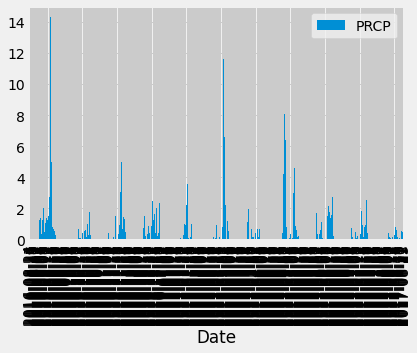

In [56]:
# Use Pandas Plotting with Matplotlib to plot the data

fig1 = df.plot.bar()
fig1

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,PRCP
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_results = session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc())

for result in active_results:
    print (result)

('USC00519281', 2772)
('USC00513117', 2696)
('USC00519397', 2685)
('USC00519523', 2572)
('USC00516128', 2484)
('USC00514830', 1937)
('USC00511918', 1932)
('USC00517948', 683)
('USC00518838', 342)


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
id = active_results[0][0]
lowest_temp = session.query(func.min(Measurement.tobs)).filter_by(station = id)
max_temp = session.query(func.max(Measurement.tobs)).filter_by(station = id)
avg_temp = session.query(func.avg(Measurement.tobs)).filter_by(station = id)
print(lowest_temp[0],max_temp[0], avg_temp[0])

(54.0,) (85.0,) (71.66378066378067,)


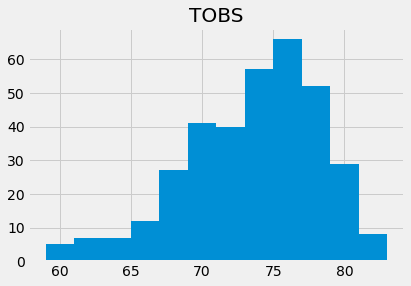

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Starting from the most recent data point in the database, Calculate the date one year from the last date in data set.

date_filter = (func.strftime('%Y-%m-%d', Measurement.date) < dt.datetime(2017,8,23)) & (func.strftime('%Y-%m-%d', Measurement.date) > dt.datetime(2016,8,23))

# Perform a query to retrieve the date and precipitation scores

tobs_results = session.query(func.strftime('%Y-%m-%d',Measurement.date), Measurement.tobs).filter(date_filter).filter_by(station = id)

# Save the query results as a Pandas DataFrame and set the index to the date column
tobs_results_rows = [{"Date": result[0], "TOBS": result[1]} for result in tobs_results]

tobs_df = pd.DataFrame(tobs_results_rows)
tobs_df = tobs_df.set_index('Date')

tobs_df = tobs_df.sort_values('Date')
tobs_df.dropna(inplace=True)

fig2 = tobs_df.hist(bins = 12)

# Close session

In [ ]:
# Close Session
session.close()